In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [3]:
wine = pd.read_csv(r"C:\Users\LENOVO\Desktop\Github\Wine Reviews\winemag-data_first150k.csv")
wine.head() # fine observation (ilk 5 gozlem )

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
wine.shape

(150930, 11)

In [4]:
wine.describe().T # describe stats (betimleyici istatistikler)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150930.0,75464.500000,43569.882402,0.0,37732.25,75464.5,113196.75,150929.0
points,150930.0,87.888418,3.222392,80.0,86.00,88.0,90.00,100.0
price,137235.0,33.131482,36.322536,4.0,16.00,24.0,40.00,2300.0


In [6]:
wine.info() # info about dataframe (dataframe hakkinda bilgi)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


* **Country: wine is from(sarabin nereden geldigi)**
* **Description: A few sentences about wine's taste, smell, look, feel, etc.(sarabin tadi, kokusu, gorunumu ile alakali bilgiler)**
* **Designation: Vineyard, where the grapes that made the wine are from (uzum sarabinin yapildigi baglar)**
* **Points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (sarabin Enstitu tarafindan 1-100 arasi puanlandirilmasi)**
* **Price: Price of wines (bir sise sarabin fiyati)**
* **Province: The province or state that the wine is from (Sarabin bulundugu il yada eyalet)**
* **region_1: The wine growing area in a province or state (bir eyaletteki sarap yetistirme alani)**
* **region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank (Sarap yetistirme alani icerisinde bazi bolgeler vardir ama bu bazen bos olabilir duruma bagli anlasilan)**
* **Variety: The type of grapes used to make the wine (sarabi yapmak icin kullanilan uzum turu)**

In [31]:
# Now we want to look unique values (benzersiz degerlere bakalim)
some = ["country","province","description","designation","region_1","region_2","variety"]
wine.loc[:,some].nunique()

country           48
province         455
description    97821
designation    30621
region_1        1236
region_2          18
variety          632
dtype: int64

In [32]:
# same time we'll check missing values (ayni zamanda eksik degerlere de bakalim)
wine.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

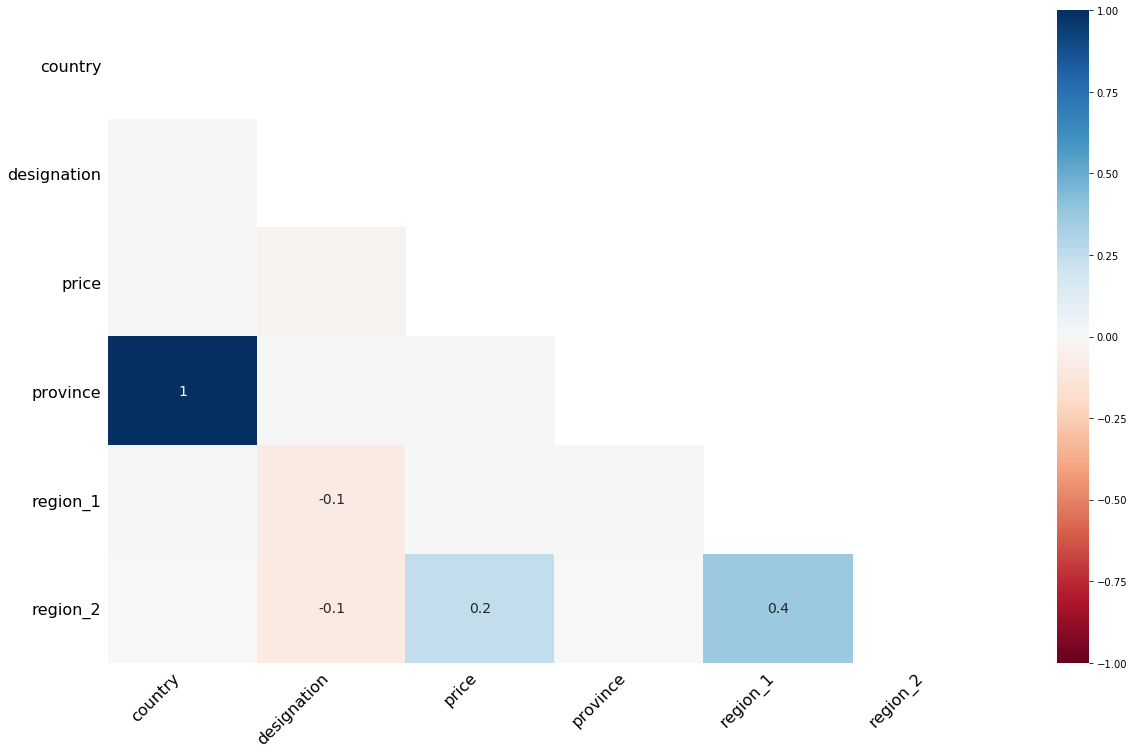

In [35]:
# will see missing values corelation
import missingno as msno

msno.heatmap(wine)

# now we are seeing country and province variables are related, in this case we shouldn't fill this two variables' missing values.
# Beacuse that missing values aren't coincidental. if we fill in missing values(country & province),it will be structural problems. 
# (kayip degerler arasinda yapisal sorunlar var mi onlara baktik, 2 adet degisken rassal olmayan bir eksiklik gorduk)
# (bu durumda bu iki degiskeni doldurmak bize problem cikartacaktir.)

In [12]:
# we should drop unimportant columns (onemsiz sutunlari dusurelim)

wine.drop(labels=["Unnamed: 0"],axis=1,inplace=True)


KeyError: "['Unnamed: 0'] not found in axis"

In [16]:
# before fill missing values we need to transformation some variables, because our variables are many of object type.
# (simdi tahmine dayali atama yapmadan once birkac degiskenimizi donusturmeliyiz cunku cogusu object tipin de)

df_one_hot = pd.get_dummies(wine, columns=["country","province"], prefix=["new_country","new_province"])
df_one_hot.head(3)

,description,designation,points,price,region_1,region_2,variety,winery,new_country_Albania,new_country_Argentina,...,new_province_Wellington,new_province_Western Australia,new_province_Western Cape,new_province_Wiener Gemischter Satz,new_province_Württemberg,new_province_Zenata,new_province_Zitsa,new_province_Österreichischer Sekt,new_province_Štajerska,new_province_Župa
0,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,Napa Valley,Napa,Cabernet Sauvignon,Heitz,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
d_f.shape

(150930, 505)

In [46]:
d_f = df_one_hot.select_dtypes(include=["float64","int64","uint8"])
d_f.columns
b = list(d_f)
b

['points',
 'price',
 'new_country_Albania',
 'new_country_Argentina',
 'new_country_Australia',
 'new_country_Austria',
 'new_country_Bosnia and Herzegovina',
 'new_country_Brazil',
 'new_country_Bulgaria',
 'new_country_Canada',
 'new_country_Chile',
 'new_country_China',
 'new_country_Croatia',
 'new_country_Cyprus',
 'new_country_Czech Republic',
 'new_country_Egypt',
 'new_country_England',
 'new_country_France',
 'new_country_Georgia',
 'new_country_Germany',
 'new_country_Greece',
 'new_country_Hungary',
 'new_country_India',
 'new_country_Israel',
 'new_country_Italy',
 'new_country_Japan',
 'new_country_Lebanon',
 'new_country_Lithuania',
 'new_country_Luxembourg',
 'new_country_Macedonia',
 'new_country_Mexico',
 'new_country_Moldova',
 'new_country_Montenegro',
 'new_country_Morocco',
 'new_country_New Zealand',
 'new_country_Portugal',
 'new_country_Romania',
 'new_country_Serbia',
 'new_country_Slovakia',
 'new_country_Slovenia',
 'new_country_South Africa',
 'new_country_

In [13]:
# we'll work on a few important variables. But don't forget that we haven't knowledge about wine production. Just we use to analytics skills.
# (birkac onemli degisken ile uzerinde calisacagiz ve unutmamak lazim bizim sarap uretimi hakkinda bilgimiz yok, analitik dusunecegiz.)
# First variable is Price (ilk degiskenimiz Fiyat yani Price)
# use the KNN 
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

d_f = wine.select_dtypes(include=["float64","int64"])

imp = KNNImputer(n_neighbors=3,weights="uniform" )
dff = imp.fit_transform(d_f)
dff = pd.DataFrame(dff)

MemoryError: Unable to allocate 15.4 GiB for an array with shape (13695, 150930) and data type float64

In [53]:
# now we can fill object variables' NaN values (kategorik degiskenleri dolduralim)
# there are different kinds of ways to fill object variables. we will see a few of them (birkac tane bu yontemlerden gorecegizi)

wine["region_2"].fillna(wine["region_2"].mode()[0])

# fill mode

0                      Napa
1             Central Coast
2                    Sonoma
3         Willamette Valley
4             Central Coast
                ...        
150925        Central Coast
150926        Central Coast
150927        Central Coast
150928        Central Coast
150929        Central Coast
Name: region_2, Length: 150930, dtype: object

In [55]:
# Filling with from before nan

wine["region_2"].fillna(method = "ffill")

0                      Napa
1                      Napa
2                    Sonoma
3         Willamette Valley
4         Willamette Valley
                ...        
150925                 Napa
150926                 Napa
150927                 Napa
150928                 Napa
150929                 Napa
Name: region_2, Length: 150930, dtype: object